## 1
Сгенерируйте случайную симметричную матрицу A размера 3 × 3. Сгенерируйте N элементов из нормального
распределения $P \propto e^{−x^TAx}$
(получится матрица объект-признак X размерности N×3). Визуализируйте полученное
облако точек (для построения интерактивных трехмерных графиков можно воспользоваться пакетом $\textbf{ipympl}$ в
системе $\textbf{jupyter}$). Примените к матрице X метод главных компонент, визуализируйте сингулярные вектора вместе с
облаком точек, а также двумерные проекции элементов выборки на плоскости, задаваемые сингулярными векторами.

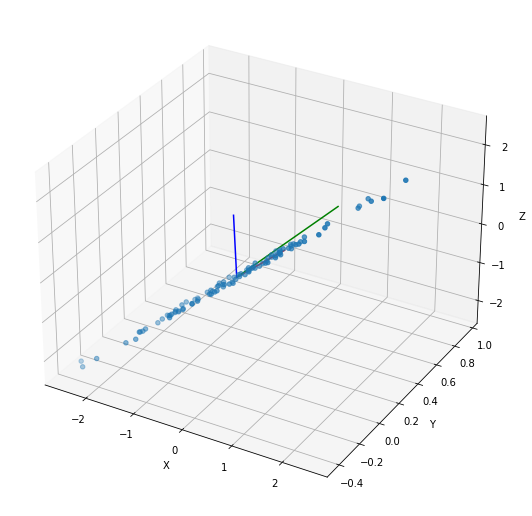

In [3]:
import numpy as np
import matplotlib.pyplot as plt
N = 100
A = np.random.random((3, 3))
A = A @ A.T

X = np.random.multivariate_normal([0,0,0], A, N)
x = X[:, 0]
y = X[:, 1]
z = X[:, 2]
fig = plt.figure(figsize=(9, 16))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, label='parametric curve')

from sklearn.decomposition import PCA 
pca = PCA(n_components=3)
pca.fit(X)

clrs = ("r", "g", "b")
for i in range(3):
    x0, y0, z0 = pca.components_[i];
    ax.plot([0, x0], [0, y0], [0, z0], color=clrs[i])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

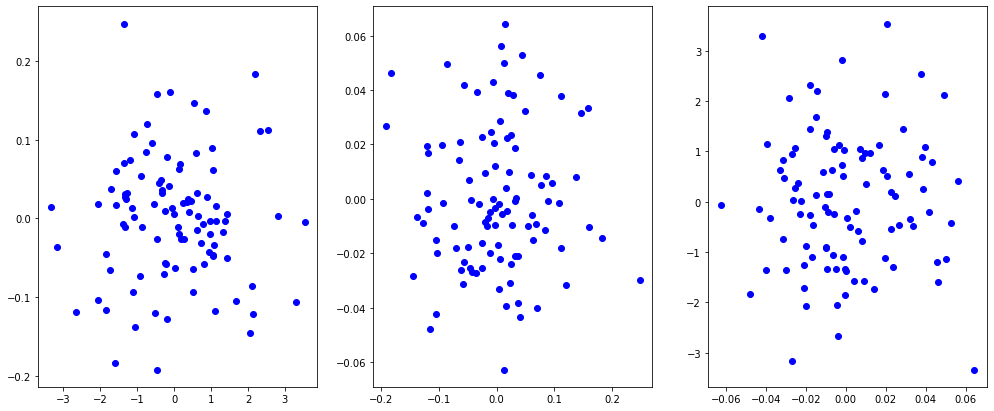

In [4]:
data = pca.transform(X)

fig, axs = plt.subplots(1, 3, figsize=(17, 7))
subscripts = ("X", "Y", "Z")

for i in range(3):
    x = data[:, i]
    y = data[:, (i+1)%3]
    axs[i].scatter(x, y, color="b")

plt.show()